In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df = pd.read_csv('results/result.csv', delimiter=';')


# Agrupando os dados pela coluna Algorithm, DatasetName e DatasetSize
grouped = df.groupby(['Algorithm', 'DatasetName', 'DatasetSize'])

result = grouped.agg({'Time': ['mean', 'std'],
                      'Counter Comparisons': ['mean', 'std'],
                      'Counter Movements': ['mean', 'std']})

# Aplainando os índices das colunas
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Redefinindo o índice para retornar um DataFrame
result.reset_index(inplace=True)

# Selecionando apenas as colunas necessárias
result = result[['Algorithm', 'DatasetName', 'DatasetSize', 
                 'Time_mean', 'Time_std', 
                 'Counter Comparisons_mean', 'Counter Comparisons_std', 
                 'Counter Movements_mean', 'Counter Movements_std']]

# Renomeando as colunas para remover "mean" e "std"
result.columns = ['Algorithm', 'DatasetName', 'DatasetSize', 
                  'Time Mean', 'Time Std', 
                  'Counter Comparisons Mean', 'Counter Comparisons Std', 
                  'Counter Movements Mean', 'Counter Movements Std']

# Exibindo o resultado
df_mean = result

In [53]:
df

,Iteration,Algorithm,DatasetName,DatasetSize,Time,Counter Comparisons,Counter Movements
0,1,bubbleSort,Ordered,10,0.088,11,3
1,1,bubbleSort,Ordered,100,0.041,101,3
2,1,bubbleSort,Ordered,1000,0.073,1001,3
3,1,bubbleSort,Ordered,10000,0.090,10001,3
4,1,bubbleSort,OrderedInverse,10,0.003,99,191
...,...,...,...,...,...,...,...
6995,50,splaySort,Random,10000,5.379,630759,955804
6996,50,splaySort,Ordered,100000,9.117,599996,899998
6997,50,splaySort,OrderedInverse,100000,8.144,599996,899998
6998,50,splaySort,AlmostOrdered,100000,36.114,4148256,6276845


In [54]:
df_mean

,Algorithm,DatasetName,DatasetSize,Time Mean,Time Std,Counter Comparisons Mean,Counter Comparisons Std,Counter Movements Mean,Counter Movements Std
0,bubbleSort,AlmostOrdered,10,0.00602,0.008707,3.736000e+01,7.615130e+00,2.536000e+01,7.411409e+00
1,bubbleSort,AlmostOrdered,100,0.06704,0.062730,4.006480e+03,2.666113e+02,2.510280e+03,2.485989e+02
2,bubbleSort,AlmostOrdered,1000,1.23362,0.285513,4.251182e+05,8.122393e+03,2.509871e+05,7.221964e+03
3,bubbleSort,AlmostOrdered,10000,102.26944,1.684279,4.327326e+07,2.477889e+05,2.492197e+07,2.167653e+05
4,bubbleSort,AlmostOrdered,100000,11362.69000,190.119442,4.361665e+09,6.934361e+06,2.499676e+09,6.970520e+06
...,...,...,...,...,...,...,...,...,...
135,splaySort,Random,10,0.01284,0.014481,1.050600e+02,8.636444e+00,1.620600e+02,1.342007e+01
136,splaySort,Random,100,0.08234,0.034980,2.512580e+03,6.726739e+01,3.826140e+03,1.054897e+02
137,splaySort,Random,1000,0.50062,0.103511,4.359540e+04,2.548744e+02,6.616220e+04,3.814875e+02
138,splaySort,Random,10000,5.37776,0.332814,6.313391e+05,9.515498e+02,9.566735e+05,1.442646e+03


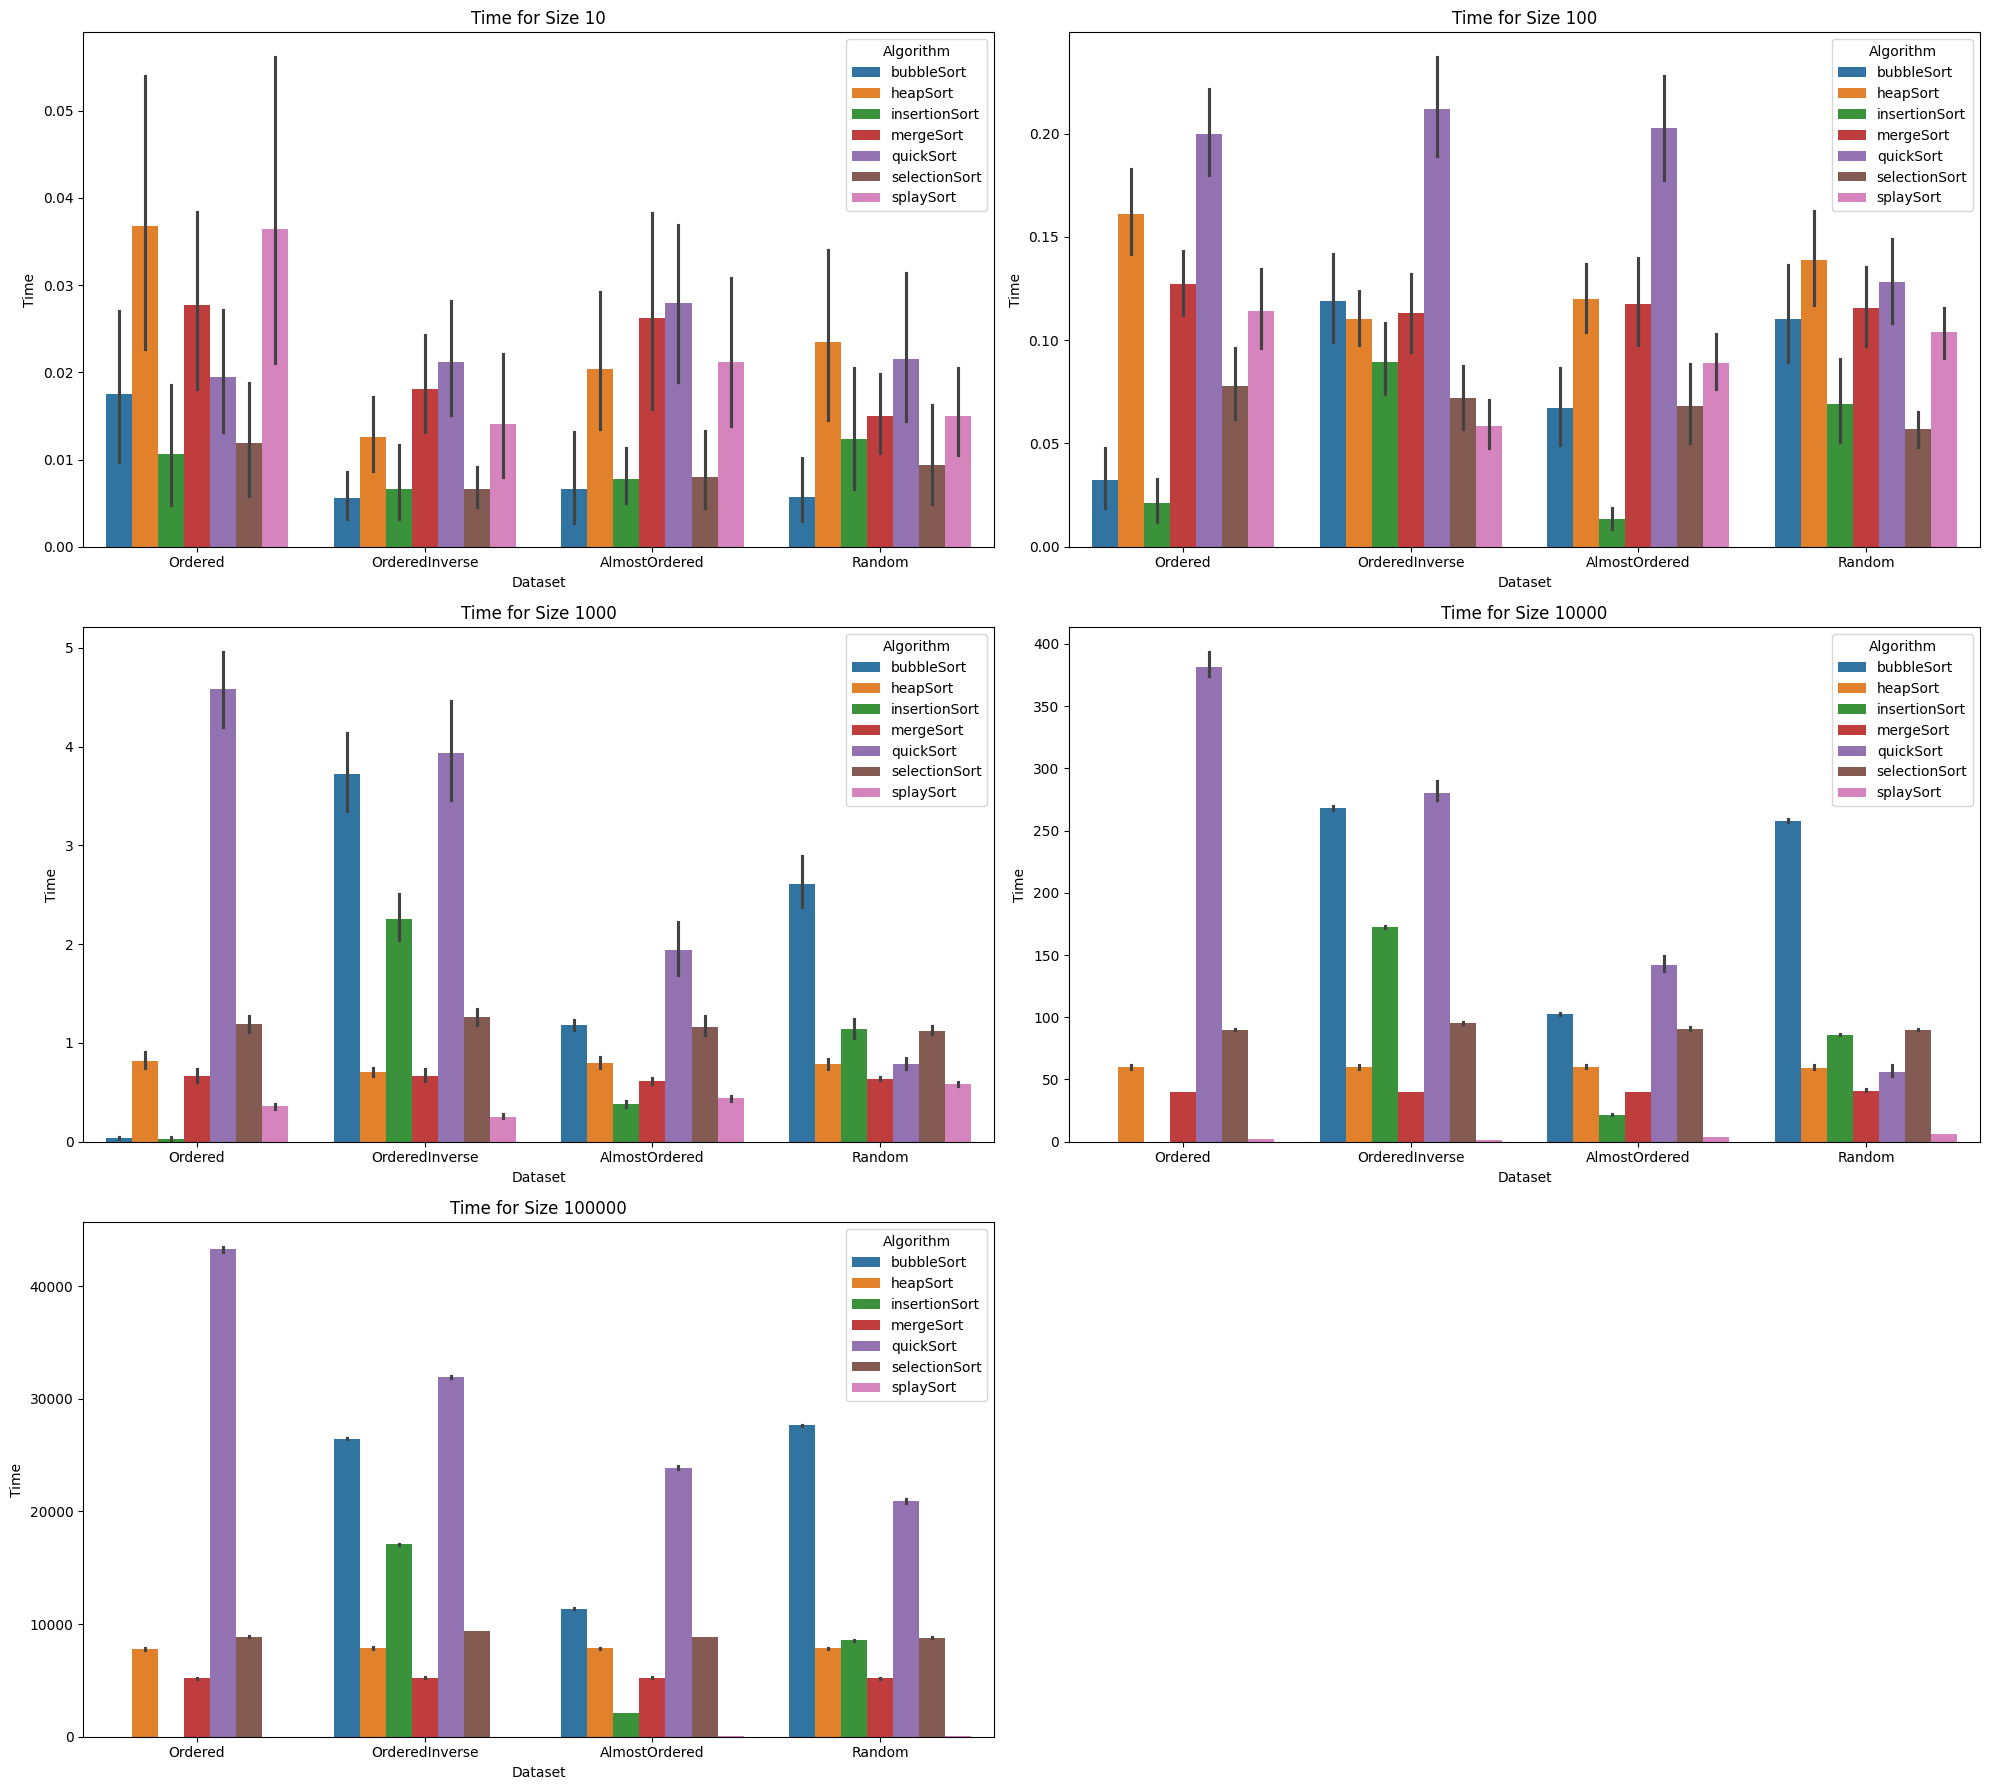

In [37]:
num_sizes = len(unique_sizes)

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(20, 6 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Iterate over each dataset size and plot the corresponding data
for i, size in enumerate(unique_sizes):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df.DatasetSize == size]
    sns.barplot(data=df_subset, x='DatasetName', y='Time', hue='Algorithm', ax=ax)
    ax.set_title(f'Time for Size {size}')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Time')

# Adjust the layout
plt.tight_layout()
plt.show()

In [57]:
# dataframe

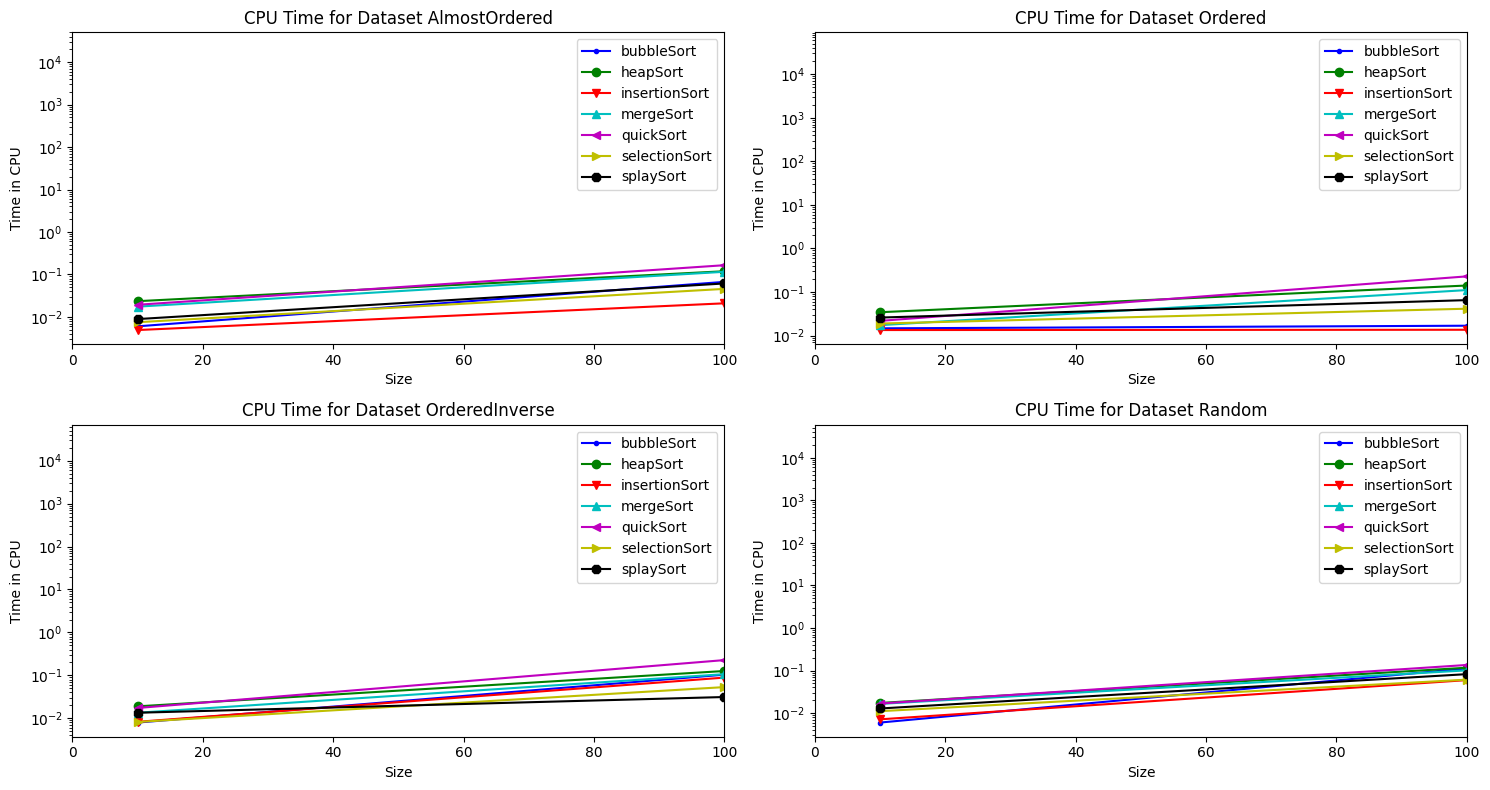

In [85]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np

num_sizes = len(df_mean['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df_mean['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df_mean[df_mean['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df_mean['Algorithm'].unique()):
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)])
    
    ax.set_title(f'CPU Time for Dataset {dataset}')
    ax.set_xlabel('Size')
    ax.set_ylabel('Time in CPU')
    ax.legend()
    ax.set_xlim(0, 100)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale

# Adjust the layout
plt.tight_layout()
plt.show()


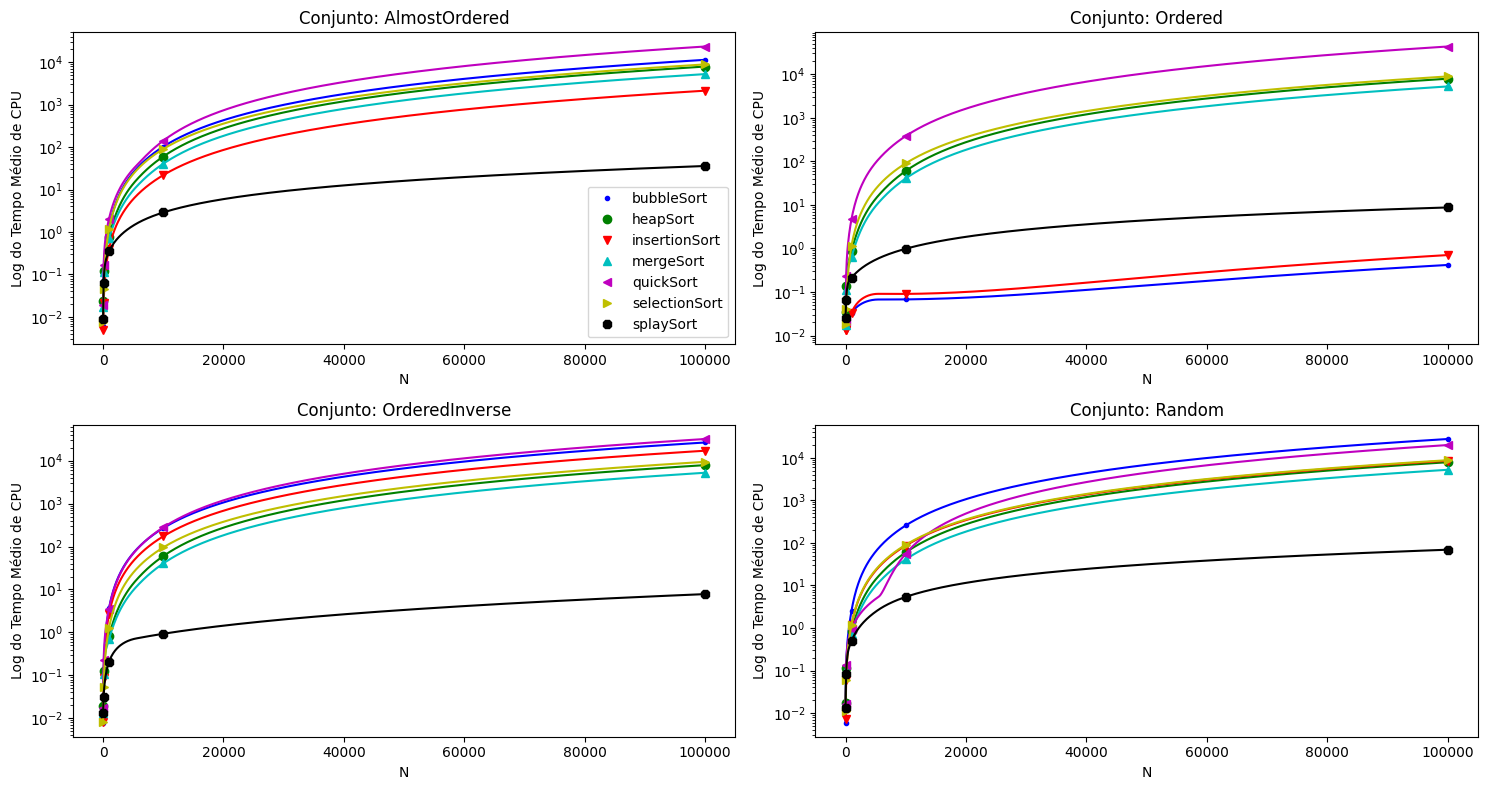

In [138]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df_mean['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df_mean['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df_mean[df_mean['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df_mean['Algorithm'].unique()):
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # Interpolation
        x = df_subset2['DatasetSize']
        y = df_subset2['Time Mean']
        f = interp1d(x, y, kind='quadratic')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log do Tempo Médio de CPU')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 50000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/tempo.png', dpi=300)
plt.show()


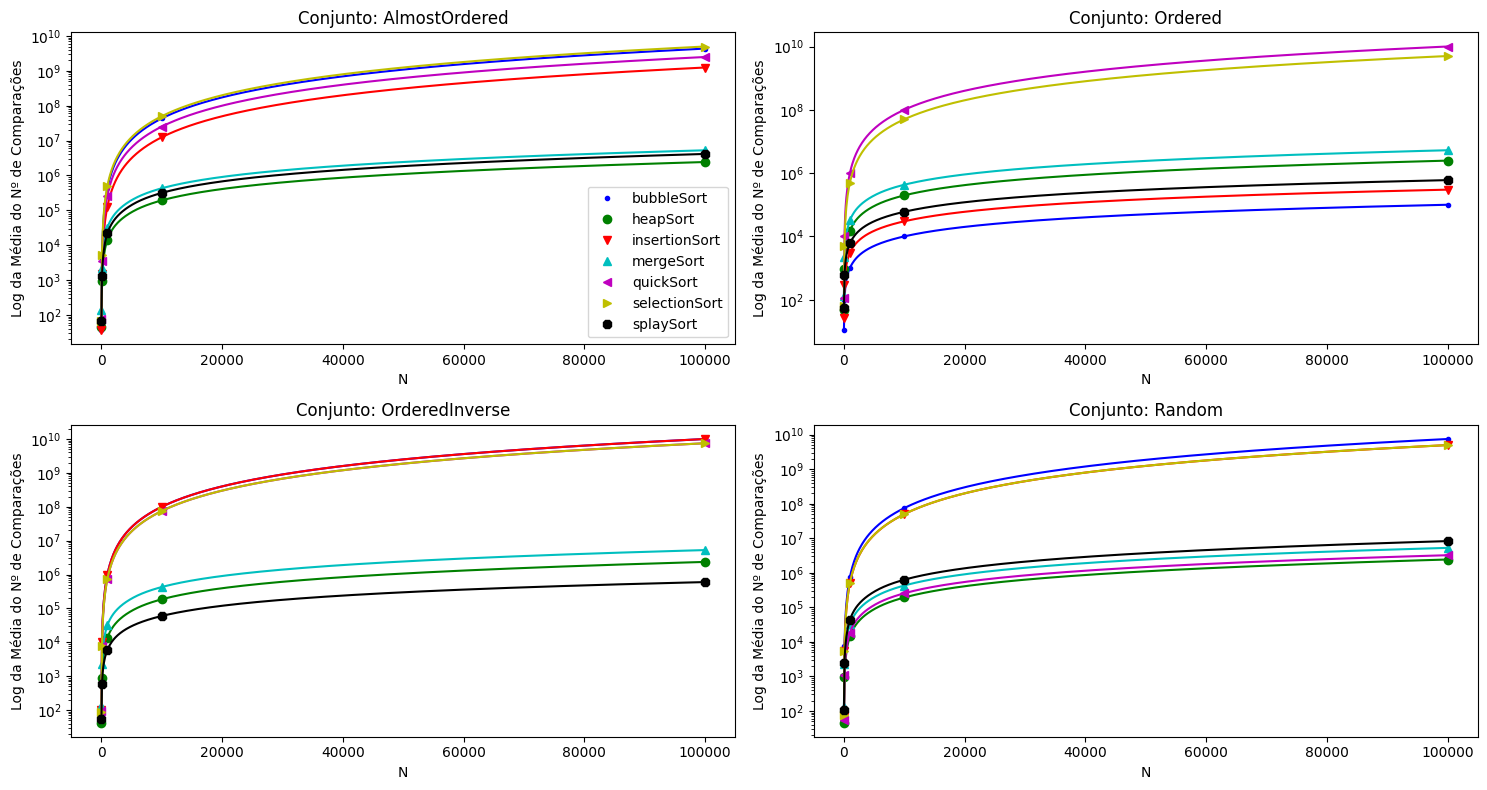

In [139]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df_mean['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df_mean['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df_mean[df_mean['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df_mean['Algorithm'].unique()):
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # Interpolation
        x = df_subset2['DatasetSize']
        y = df_subset2['Counter Comparisons Mean']
        f = interp1d(x, y, kind='quadratic')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Nº de Comparações')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 50000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/comparacoes.png', dpi=300)
plt.show()


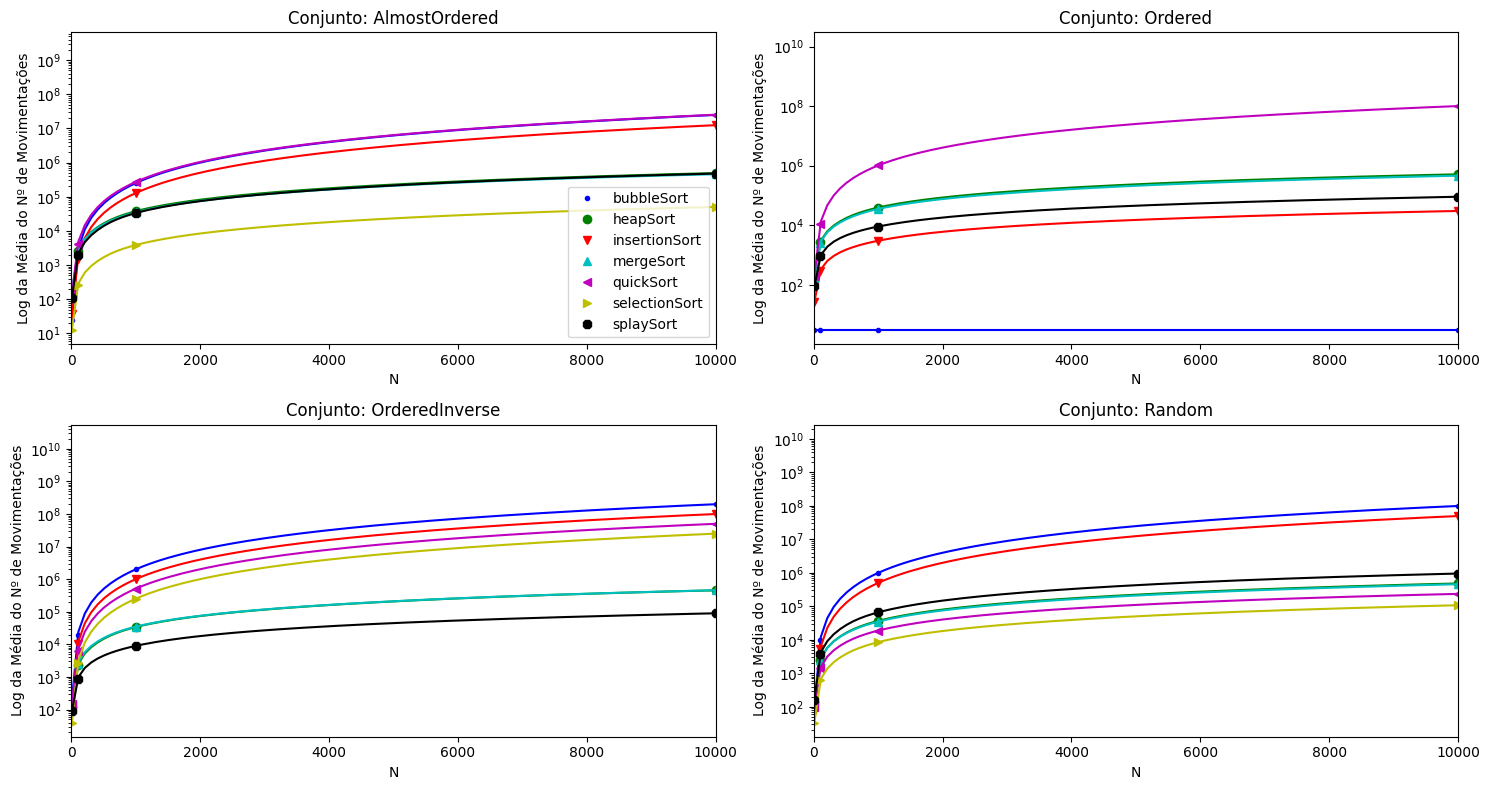

In [179]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df_mean['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df_mean['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df_mean[df_mean['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df_mean['Algorithm'].unique()):
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # Interpolation
        x = df_subset2['DatasetSize']
        y = df_subset2['Counter Movements Mean']
        f = interp1d(x, y, kind='quadratic')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Nº de Movimentações')
    if i == 0:
        ax.legend()
    ax.set_xlim(0, 10000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/movimentacoes.png', dpi=300)
plt.show()


In [151]:
df_mean.groupby(['Algorithm', 'DatasetSize', 'DatasetName']).mean()

Time Mean  Time Std  \
Algorithm  DatasetSize DatasetName                           
bubbleSort 10          AlmostOrdered     0.00602  0.008707   
                       Ordered           0.01462  0.034902   
                       OrderedInverse    0.00798  0.010151   
                       Random            0.00600  0.008485   
           100         AlmostOrdered     0.06704  0.062730   
...                                          ...       ...   
splaySort  10000       Random            5.37776  0.332814   
           100000      AlmostOrdered    35.90220  0.760715   
                       Ordered           8.72280  0.362097   
                       OrderedInverse    7.80966  0.476723   
                       Random           69.16542  0.886004   

                                       Counter Comparisons Mean  \
Algorithm  DatasetSize DatasetName                                
bubbleSort 10          AlmostOrdered                      37.36   
                       Ordered                            11.00   
                       OrderedInverse                     99.00   
                       Random                             75.06   
           100         AlmostOrdered                    4006.48   
...                                                         ...   
splaySort  10000       Random                         631339.14   
           100000      AlmostOrdered                 4147085.04   
                       Ordered                        599996.00   
                       OrderedInverse                 599996.00   
                       Random                        8290631.56   

                                       Counter Comparisons Std  \
Algorithm  DatasetSize DatasetName                               
bubbleSort 10          AlmostOrdered                  7.615130   
                       Ordered                        0.000000   
                       OrderedInverse                 0.000000   
                       Random                         8.286724   
           100         AlmostOrdered                266.611331   
...                                                        ...   
splaySort  10000       Random                       951.549842   
           100000      AlmostOrdered               2259.984955   
                       Ordered                        0.000000   
                       OrderedInverse                 0.000000   
                       Random                      3624.760401   

                                       Counter Movements Mean  \
Algorithm  DatasetSize DatasetName                              
bubbleSort 10          AlmostOrdered                    25.36   
                       Ordered                           3.00   
                       OrderedInverse                  191.00   
                       Random                          103.20   
           100         AlmostOrdered                  2510.28   
...                                                       ...   
splaySort  10000       Random                       956673.48   
           100000      AlmostOrdered               6275009.38   
                       Ordered                      899998.00   
                       OrderedInverse               899998.00   
                       Random                     12549897.18   

                                       Counter Movements Std  
Algorithm  DatasetSize DatasetName                            
bubbleSort 10          AlmostOrdered                7.411409  
                       Ordered                      0.000000  
                       OrderedInverse               0.000000  
                       Random                      23.308928  
           100         AlmostOrdered              248.598934  
...                                                      ...  
splaySort  10000       Random                    1442.646211  
           100000      AlmostOrdered             3227.518829  
                       Or

In [173]:
df_100k = df[df.DatasetSize == 100000]
df_100k

,Iteration,Algorithm,DatasetName,DatasetSize,Time,Counter Comparisons,Counter Movements
16,1,bubbleSort,Ordered,100000,0.664,100001,3
17,1,bubbleSort,OrderedInverse,100000,26413.500,9999999999,19999900001
18,1,bubbleSort,AlmostOrdered,100000,11338.000,4369093224,2497545472
19,1,bubbleSort,Random,100000,27541.400,7490734182,9962909879
36,2,bubbleSort,Ordered,100000,0.538,100001,3
...,...,...,...,...,...,...,...
6979,49,splaySort,Random,100000,69.738,8286746,12542653
6996,50,splaySort,Ordered,100000,9.117,599996,899998
6997,50,splaySort,OrderedInverse,100000,8.144,599996,899998
6998,50,splaySort,AlmostOrdered,100000,36.114,4148256,6276845


In [174]:
(df_100k.groupby(['DatasetName','Algorithm'])[['Time','Counter Comparisons', 'Counter Movements']].agg(['mean', 'std'])).round(2)

Time         Counter Comparisons  \
                                  mean     std                mean   
DatasetName    Algorithm                                             
AlmostOrdered  bubbleSort     11362.69  190.12        4.361665e+09   
               heapSort        7883.66  307.37        2.431155e+06   
               insertionSort   2132.44   13.25        1.250113e+09   
               mergeSort       5235.56  245.47        5.279005e+06   
               quickSort      23376.72  584.87        2.502740e+09   
               selectionSort   8858.74   34.66        5.000620e+09   
               splaySort         35.90    0.76        4.147085e+06   
Ordered        bubbleSort         0.42    0.13        1.000010e+05   
               heapSort        7891.50  374.38        2.482077e+06   
               insertionSort      0.70    0.14        2.999970e+05   
               mergeSort       5238.90  239.40        5.279005e+06   
               quickSort      43270.44  898.70        1.000020e+10   
               selectionSort   8887.27   34.15        5.000150e+09   
               splaySort          8.72    0.36        5.999960e+05   
OrderedInverse bubbleSort     26475.37  367.98        1.000000e+10   
               heapSort        7873.37  355.09        2.361178e+06   
               insertionSort  17033.28   57.14        1.000000e+10   
               mergeSort       5225.68  227.87        5.279005e+06   
               quickSort      31915.13  527.82        7.500200e+09   
               selectionSort   9394.87   34.24        7.500150e+09   
               splaySort          7.81    0.48        5.999960e+05   
Random         bubbleSort     27635.16  567.23        7.499619e+09   
               heapSort        7866.55  287.58        2.430894e+06   
               insertionSort   8520.69   38.60        4.999623e+09   
               mergeSort       5223.94  259.19        5.279005e+06   
               quickSort      19941.58  814.00        3.237962e+06   
               selectionSort   8778.08   25.42        5.001159e+09   
               splaySort         69.17    0.89        8.290632e+06   

                                          Counter Movements               
                                      std              mean          std  
DatasetName    Algorithm                                                  
AlmostOrdered  bubbleSort      6934360.62      2.499676e+09   6970519.60  
               heapSort            303.09      6.115049e+06       704.03  
               insertionSort   3485261.74      1.250113e+09   3485261.74  
               mergeSort             0.00      5.579005e+06         0.00  
               quickSort        283202.78      2.503026e+09    298113.83  
               selectionSort      3592.84      6.196953e+05      3594.45  
               splaySort          2259.98      6.275009e+06      3227.52  
Ordered        bubbleSort            0.00      3.000000e+00         0.00  
               heapSort              0.00      6.272611e+06         0.00  
               insertionSort         0.00      2.999970e+05         0.00  
               mergeSort             0.00      5.579005e+06         0.00  
               quickSort             0.00      1.000110e+10         0.00  
               selectionSort         0.00      0.000000e+00         0.00  
               splaySort             0.00      8.999980e+05         0.00  
OrderedInverse bubbleSort            0.00      1.999990e+10         0.00  
               heapSort              0.00      5.724160e+06         0.00  
               insertionSort         0.00      1.000010e+10         0.00  
               mergeSort             0.00      5.579005e+06         0.00  
               quickSort             0.00      5.001100e+09         0.00  
               selectionSort         0.00      2.500150e+09         0.00  
               splaySort             0.00      8.999980e+05         0.00  
Random         bubbleSort      5919085.68      9.998746e+09  23